### Shoji et al, 2018. Volcanic ash classification using CNN

### Definition of batch size and classes

In [235]:
batch_size = 40

In [236]:
ls = ["blocky", "vesicular", "rounded", "elongated"]

### Separation in train-test

In [291]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# preprocess and augmentate images dataset

train_datagen = ImageDataGenerator(
        validation_split=0.1,
        rescale=1/255,
        horizontal_flip=True,
        fill_mode='nearest')

# split in train test
train_generator = train_datagen.flow_from_directory(
        '',  # same dir as notebook
        target_size=(50, 50),  #reescalar
        batch_size=batch_size,
        # specify classes
        classes = ls,
        # use as categorical classification
        class_mode='categorical',
        subset='training')

val_generator = train_datagen.flow_from_directory(

        '',  # same dir as notebook
        target_size=(50, 50),  # rescale to size of images
        batch_size=batch_size,
        # especificar clases obtenidas
        classes = ls,
        # use as categorical classification
        class_mode='categorical',
        subset='validation')

Found 882 images belonging to 4 classes.
Found 95 images belonging to 4 classes.


### tf imports and GPU configuration

In [292]:
import tensorflow as tf 
import keras
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Model definition 
using 2 convs, 2 poolings, 2 dense layers, a dropout of 0.3 and a final dense layer for the 4 classes

In [294]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 50x50 with 3 bytes color
    # first convolution
    tf.keras.layers.Conv2D(16, (9,9),activation=keras.layers.LeakyReLU(alpha=0.3), input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second convolution
    tf.keras.layers.Conv2D(32, (7,7),activation=keras.layers.LeakyReLU(alpha=0.3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    # dense layers and dropout
    tf.keras.layers.Dense(80, activation=keras.layers.LeakyReLU(alpha=0.3)),
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Dense(40, activation=keras.layers.LeakyReLU(alpha=0.3)),
    # 4 output neurons for 4 classes with the softmax activation
    tf.keras.layers.Dense(4, activation='softmax')
])

# flatten, dense, dropout, dense, dropout

In [295]:
model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 42, 42, 16)        3904      
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 21, 21, 16)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 15, 15, 32)        25120     
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_46 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_107 (Dense)            (None, 80)                125520    
_________________________________________________________________
dropout_45 (Dropout)         (None, 80)              

### Training the model for 100 epochs

In [296]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
n_epochs = 100

In [297]:
history = model.fit(
        train_generator, 
        steps_per_epoch=train_generator.n//batch_size,  
        epochs=n_epochs,
        validation_data=val_generator,
        validation_steps= val_generator.n//batch_size,   
        verbose=1)

Epoch 1/100
22/22 [==============================] - 1s 23ms/step - loss: 1.3303 - acc: 0.3985 - val_loss: 0.8623 - val_acc: 0.6500
Epoch 2/100
22/22 [==============================] - 0s 15ms/step - loss: 0.8034 - acc: 0.6211 - val_loss: 0.6458 - val_acc: 0.7500
Epoch 3/100
22/22 [==============================] - 0s 16ms/step - loss: 0.7442 - acc: 0.6788 - val_loss: 0.6097 - val_acc: 0.7625
Epoch 4/100
22/22 [==============================] - 0s 16ms/step - loss: 0.6658 - acc: 0.7372 - val_loss: 0.4935 - val_acc: 0.8125
Epoch 5/100
22/22 [==============================] - 0s 16ms/step - loss: 0.6382 - acc: 0.7324 - val_loss: 0.6111 - val_acc: 0.7375
Epoch 6/100
22/22 [==============================] - 0s 15ms/step - loss: 0.5940 - acc: 0.7536 - val_loss: 0.5666 - val_acc: 0.7750
Epoch 7/100
22/22 [==============================] - 0s 15ms/step - loss: 0.5855 - acc: 0.7789 - val_loss: 0.5311 - val_acc: 0.8000
Epoch 8/100
22/22 [==============================] - 0s 16ms/step - loss: 0.

22/22 [==============================] - 0s 15ms/step - loss: 0.0991 - acc: 0.9599 - val_loss: 0.8086 - val_acc: 0.8750
Epoch 63/100
22/22 [==============================] - 0s 15ms/step - loss: 0.1110 - acc: 0.9584 - val_loss: 0.9878 - val_acc: 0.8000
Epoch 64/100
22/22 [==============================] - 0s 16ms/step - loss: 0.0336 - acc: 0.9916 - val_loss: 1.0908 - val_acc: 0.8875
Epoch 65/100
22/22 [==============================] - 0s 15ms/step - loss: 0.0683 - acc: 0.9770 - val_loss: 0.8298 - val_acc: 0.8625
Epoch 66/100
22/22 [==============================] - 0s 16ms/step - loss: 0.0500 - acc: 0.9828 - val_loss: 0.9946 - val_acc: 0.8500
Epoch 67/100
22/22 [==============================] - 0s 16ms/step - loss: 0.0918 - acc: 0.9629 - val_loss: 0.9039 - val_acc: 0.8750
Epoch 68/100
22/22 [==============================] - 0s 15ms/step - loss: 0.0439 - acc: 0.9819 - val_loss: 0.5174 - val_acc: 0.9250
Epoch 69/100
22/22 [==============================] - 0s 15ms/step - loss: 0.0422 

In [ ]:
### Metrics and evaluation of the model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

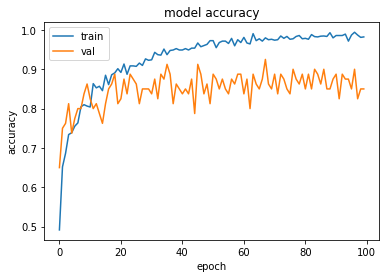

In [298]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

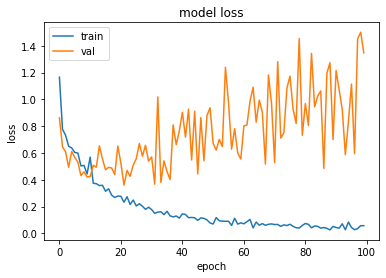

In [299]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### [FUTURE] do tests with external images, try transfer learning